<a href="https://colab.research.google.com/github/Light0Yagami/Face-Mask-Detection-using-CNN/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir .p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘.p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#API command to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_list = os.listdir("/content/data/with_mask")
print(with_mask_list[0:5])
print(with_mask_list[-5:])

['with_mask_1793.jpg', 'with_mask_2638.jpg', 'with_mask_3534.jpg', 'with_mask_133.jpg', 'with_mask_1617.jpg']
['with_mask_1674.jpg', 'with_mask_3597.jpg', 'with_mask_799.jpg', 'with_mask_3286.jpg', 'with_mask_1491.jpg']


In [ ]:
without_mask_list = os.listdir("/content/data/without_mask")
print(without_mask_list[0:5])
print(without_mask_list[-5:])

['without_mask_121.jpg', 'without_mask_301.jpg', 'without_mask_3122.jpg', 'without_mask_3316.jpg', 'without_mask_2878.jpg']
['without_mask_3129.jpg', 'without_mask_3641.jpg', 'without_mask_2139.jpg', 'without_mask_174.jpg', 'without_mask_1651.jpg']


In [ ]:
print(len(with_mask_list))
print(len(without_mask_list))

3725
3828


Creating label for images

with mask -> 1
without mask -> 0

In [ ]:
#creating the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828



In [ ]:
print(with_mask_labels[0:5])
print(len(with_mask_labels))
print(without_mask_labels[0:5])
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
3725
[0, 0, 0, 0, 0]
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

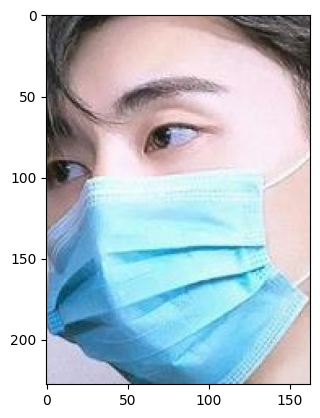

In [ ]:
#displaying with mask images
img = mpimg.imread("/content/data/with_mask/with_mask_1545.jpg")
imgplot = plt.imshow(img);

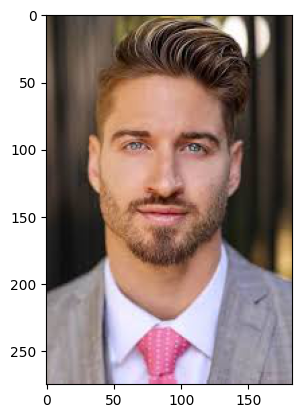

In [ ]:
#displaying with mask images
img = mpimg.imread("/content/data/without_mask/without_mask_3129.jpg")
imgplot = plt.imshow(img);
plt.show()

Image Processing
 1. Resize the images
 2. Convert the images to numpy arrays

In [ ]:
with_mask_path = "/content/data/with_mask/";

data = []

for img_file in with_mask_list:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/";


for img_file in without_mask_list:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(type(data))
print(len(data))

<class 'list'>
7553


In [ ]:
data[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [249, 249, 249],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[235, 233, 246],
        [235, 233, 246],
        [236, 234, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[233, 231, 245],
        [233, 231, 245],
        [235, 232, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[231, 228, 245],
        [231, 228, 245],
        [233, 230, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting the image list and label list to numpy array
x = np.array(data)
y = np.array(labels)
type(x)
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


Train Test Spilt

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [ ]:
print(x.shape,X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scalling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 24,  14,  16],
        [ 22,  14,  15],
        [ 22,  16,  16],
        ...,
        [ 39,  29,  27],
        [ 33,  25,  23],
        [ 45,  36,  36]],

       [[ 24,  18,  17],
        [ 22,  17,  16],
        [ 19,  17,  15],
        ...,
        [ 34,  24,  20],
        [ 34,  26,  23],
        [ 35,  27,  25]],

       [[ 20,  21,  16],
        [ 19,  20,  16],
        [ 16,  17,  14],
        ...,
        [ 31,  22,  17],
        [ 33,  26,  20],
        [ 33,  25,  21]],

       ...,

       [[162, 172, 167],
        [154, 164, 158],
        [193, 203, 195],
        ...,
        [240, 220, 213],
        [240, 220, 213],
        [240, 220, 213]],

       [[ 92, 103, 101],
        [173, 182, 179],
        [225, 230, 224],
        ...,
        [239, 219, 212],
        [239, 219, 212],
        [239, 219, 212]],

       [[113, 119, 121],
        [205, 208, 209],
        [240, 240, 236],
        ...,
        [239, 219, 212],
        [238, 218, 211],
        [239, 219, 212]]

In [ ]:
X_train_scaled[0]

array([[[0.09411765, 0.05490196, 0.0627451 ],
        [0.08627451, 0.05490196, 0.05882353],
        [0.08627451, 0.0627451 , 0.0627451 ],
        ...,
        [0.15294118, 0.11372549, 0.10588235],
        [0.12941176, 0.09803922, 0.09019608],
        [0.17647059, 0.14117647, 0.14117647]],

       [[0.09411765, 0.07058824, 0.06666667],
        [0.08627451, 0.06666667, 0.0627451 ],
        [0.0745098 , 0.06666667, 0.05882353],
        ...,
        [0.13333333, 0.09411765, 0.07843137],
        [0.13333333, 0.10196078, 0.09019608],
        [0.1372549 , 0.10588235, 0.09803922]],

       [[0.07843137, 0.08235294, 0.0627451 ],
        [0.0745098 , 0.07843137, 0.0627451 ],
        [0.0627451 , 0.06666667, 0.05490196],
        ...,
        [0.12156863, 0.08627451, 0.06666667],
        [0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.09803922, 0.08235294]],

       ...,

       [[0.63529412, 0.6745098 , 0.65490196],
        [0.60392157, 0.64313725, 0.61960784],
        [0.75686275, 0

Building a Convolutional Neural Networks(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 22ms/step - loss: 0.4337 - acc: 0.8155 - val_loss: 0.3516 - val_acc: 0.8397
Epoch 2/5
170/170 [==============================] - 5s 27ms/step - loss: 0.2814 - acc: 0.8885 - val_loss: 0.2858 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2382 - acc: 0.9062 - val_loss: 0.2436 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2103 - acc: 0.9159 - val_loss: 0.2193 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1759 - acc: 0.9362 - val_loss: 0.2175 - val_acc: 0.9107


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accurarcy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2026 - acc: 0.9265
Test Accurarcy = 0.9265387058258057


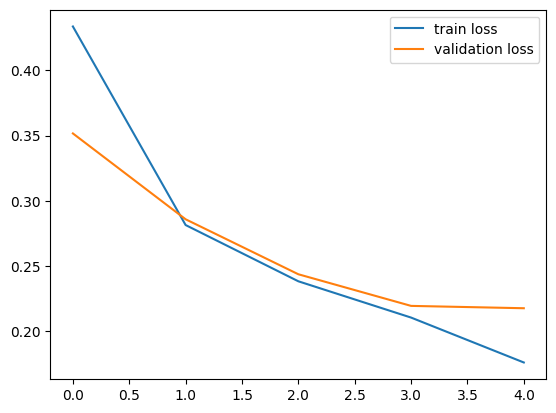

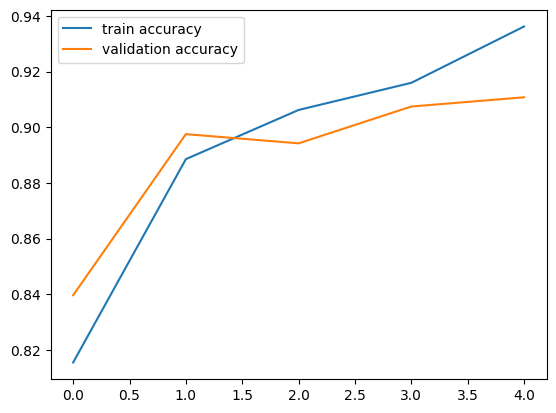

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plt the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()



Predicitve System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')